<a href="https://colab.research.google.com/github/TKph/colab/blob/main/SVC%E3%81%AB%E3%82%88%E3%82%8B%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
# データ生成


---



In [ ]:
!pip install -U scikit-learn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

plt.style.use('seaborn-darkgrid')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-1-33ee9528d3f2>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


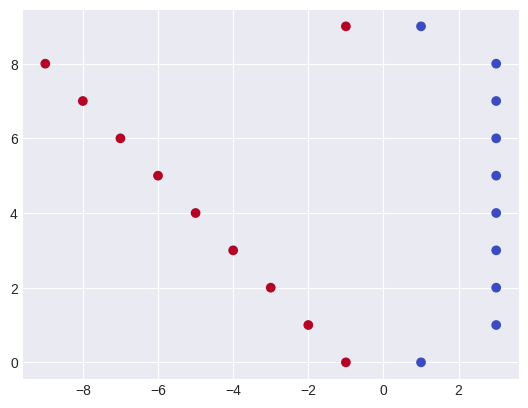

In [ ]:
X = np.zeros((20,2))
X[0:10,1] = range(0,10)
X[10:20,1] = range(0,10)
X[0,0] = 1.0
X[1:9,0] = 3.0
X[9,0] = 1.0
X[10:20,0] = range(-1,-11,-1)
X[9,0] = 1
X[19,0] = -1

y = np.zeros((20))
y[10:20] = 1.0
y = y.astype(np.int8)

plt.scatter(X[:,0],X[:,1], c = y, cmap = plt.cm.coolwarm)
plt.show()



---
# 比較のためにロジスティクス回帰を適用


---



In [ ]:
!pip install mlxtend --upgrade --no-deps
from mlxtend.plotting import plot_decision_regions

sc = preprocessing.StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: >

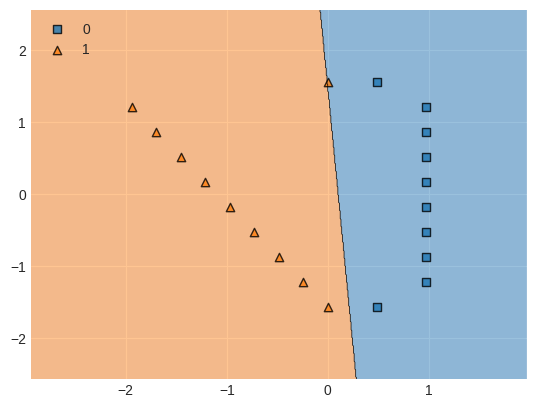

In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(X_std, y)
plot_decision_regions(X_std, y, clf = lr, legend = 2)



---

# ハードマージンSVCを実装

---



In [ ]:
from sklearn import svm

<Axes: >

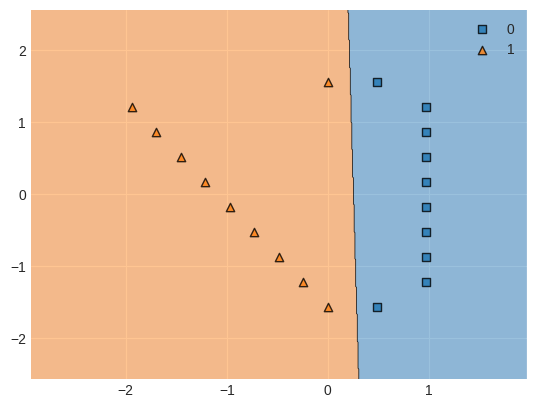

In [ ]:
clf = svm.LinearSVC(random_state=0)
clf.fit(X_std, y)
plot_decision_regions(X_std, y, clf = clf)



---
# ソフトマージンSVCの実装


---



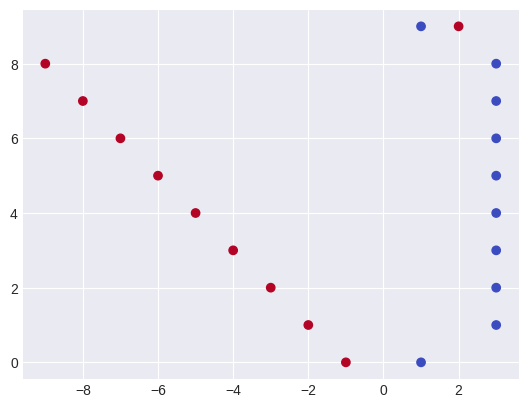

In [ ]:
X[19,0] = 2
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.coolwarm)
plt.show()

<Axes: >

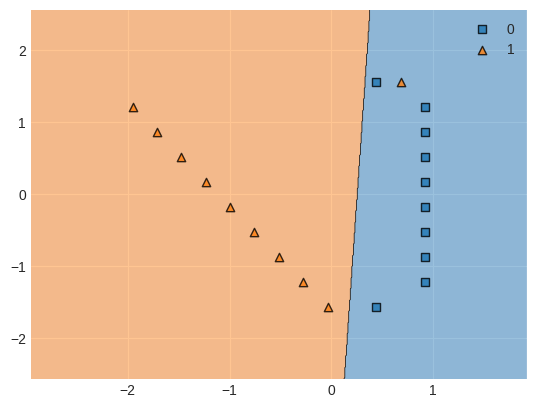

In [ ]:
sc = preprocessing.StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

clf = svm.LinearSVC(random_state=0) #ハイパーパラメータCはdefaultで1. Cはマージン最大化とペナルティ(誤分類)のバランスをとる. 大きい方がマージン最大化を重視.
clf.fit(X_std, y)
plot_decision_regions(X_std, y, clf = clf)

<Axes: >

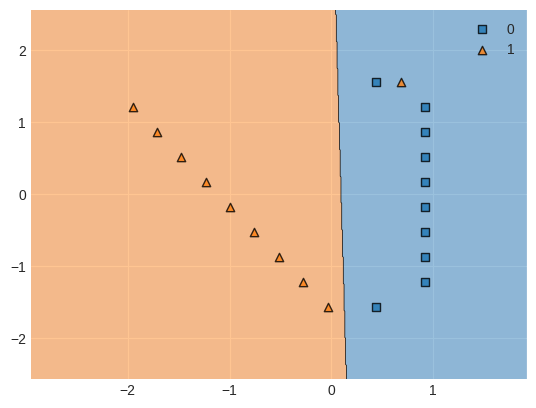

In [ ]:
clf = svm.LinearSVC(C = 0.2, random_state=0)
clf.fit(X_std, y)
plot_decision_regions(X_std, y, clf = clf)



---

# 理論的な解説

---



前提:
ハードかソフトかはデータが直線で完全に分類可能かどうかで決まる。ハードSVCとソフトSVCのアルゴリズムは実質的には等しい.


*   ハードマージン

先に天下りに結論となる式を与えておく.
$$y_{i}(w^Tx_i+b) \ge 1 \quad -① \quadを条件とする$$

$$ min_{w,b} \quad \frac{1}{2}w^{T}w $$

$y_{i}$は$i$番目のデータのラベルで$1$ or $-1$. $x_i$は$i$番目のデータで今回は2次元である. ①式は2次元の場合$w$は(a,b)と考えて, $w^Tx_i+b$の部分は $ax + by + c = 0$ という直線の式と解釈しよう.

ラベルが-1のデータに対しては $w^tx_i+b \leq -1$ を満たすような$w$と$x$を求める.逆にラベルが1のデータに対しては$w^tx_i+b \ge 1$を満たすような$w$と$x$を求めることが目的である. そこで①式によって同時に表せる. しかしそのような$w$と$x$は無数にあるので最小のものを求める. 

さて, 2次元平面で点と直線の距離は
$$ d = \frac{\lvert ax+by+c \rvert}{\sqrt{a^2+b^2}}$$
と表せる.
N次元の場合も同様に
$$ d = \frac{\lvert w^Tx+b \rvert}{\sqrt{w_1^2+w_2^2+...w_N^2}}=\frac{y_i(w^tx_i+b)}{||w||}$$
ここでなんやかんやあって, 超平面に一番近い点を$x_n$として$y_n(w^Tx_n+b)=1$と表せるらしい. 結局$ \frac{1}{||w||} $を最大化すればよい. 変形して, $\frac{||w||}{2}$を最小化すればよい. このようにして先に与えた式を得られる.


*   ソフトマージン
これも先に結論を与えておく.
$$ min_{w,b} \quad \frac{1}{2}w^{T}w+C\sum_I\zeta_i $$

ソフトマージンでは完全に分類できない. つまりラベル1のデータの場合, $ w^tx+b \ge 1$を満たさないことがある. そこでhinge関数を使ってペナルティを課す. 
$$ \zeta=f(1-y_i(w^tx+b)) $$
$$ hinge関数 \quad f= \left \{
    \begin{aligned}
    & x \quad (x \gt 0) \\
    & 0 \quad (x \le 0) 
    \end{aligned}
\right.$$
$\zeta$をスラック変数と呼ぶ. これにより, 例えば正例が正しく分類される場合$ 1-y_i(w^t+b) \lt0$となるので$\zeta=0$になる. 逆に正しく分類されないとき, $1-y_i(w^tx+b) \gt 0$になるので$\zeta \gt0$となる.

